In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
g_f = pd.read_csv("G1E_feat.bed", sep = '\t')
g_f

,chr19,3197214,3198214,promoter,.,-,0
0,chr19,3197605,3197714,exon,.,-,0
1,chr19,3197029,3197605,intron,.,-,0
2,chr19,3196945,3197029,exon,.,-,0
3,chr19,3075885,3196945,intron,.,-,0
4,chr19,3075714,3075885,exon,.,-,0
...,...,...,...,...,...,...,...
14628,chr19,61225133,61225214,exon,.,-,0
14629,chr19,61225033,61225133,intron,.,-,0
14630,chr19,61224402,61225033,exon,.,-,0
14631,chr19,61296569,61297569,promoter,.,-,0


In [22]:
g_ex = g_f.iloc[:, 3] == 'exon'
g_ex = g_f.loc[g_ex, :]
g_ex_true = g_ex.iloc[:, 6] != 0
g_ex_true = g_ex.loc[g_ex_true,:]
g_ex_true_count = g_ex_true.iloc[:, 6]
g_ex_sum = g_ex_true_count.sum()
g_ex_sum

32

In [84]:
g_int = g_f.iloc[:, 3] == 'intron'
g_int = g_f.loc[g_int, :]
g_int_true = g_int.iloc[:, 6] != 0
g_int_true = g_int.loc[g_int_true,:]
g_int_true_count = g_int_true.iloc[:, 6]
g_int_sum = g_int_true_count.sum()
g_int_sum

,chr19,3197214,3198214,promoter,.,-,0
53,chr19,3289087,3292436,intron,.,+,1
81,chr19,3371677,3375093,intron,.,+,1
195,chr19,3622726,3628273,intron,.,-,1
223,chr19,3586480,3590974,intron,.,-,2
369,chr19,3944296,3947007,intron,.,+,1
...,...,...,...,...,...,...,...
14389,chr19,60160280,60161061,intron,.,+,1
14423,chr19,60545541,60563162,intron,.,-,1
14551,chr19,60890631,60987702,intron,.,+,1
14573,chr19,61083269,61086072,intron,.,+,1


In [46]:
g_p = g_f.iloc[:, 3] == 'promoter'
g_p = g_f.loc[g_p, :]
g_p_true = g_p.iloc[:, 6] != 0
g_p_true = g_p.loc[g_p_true,:]
g_p_true_count = g_p_true.iloc[:, 6]
g_p_sum = g_p_true_count.sum()

In [56]:
g_sums = [g_ex_sum, g_int_sum, g_p_sum]
print(g_sums)

[32, 275, 43]


In [26]:
e_f = pd.read_csv("ER4_feat.bed", sep = '\t')
e_f

,chr19,3197214,3198214,promoter,.,-,0
0,chr19,3197605,3197714,exon,.,-,0
1,chr19,3197029,3197605,intron,.,-,0
2,chr19,3196945,3197029,exon,.,-,0
3,chr19,3075885,3196945,intron,.,-,0
4,chr19,3075714,3075885,exon,.,-,0
...,...,...,...,...,...,...,...
14628,chr19,61225133,61225214,exon,.,-,0
14629,chr19,61225033,61225133,intron,.,-,0
14630,chr19,61224402,61225033,exon,.,-,0
14631,chr19,61296569,61297569,promoter,.,-,0


In [27]:
e_ex = e_f.iloc[:, 3] == 'exon'
e_ex = e_f.loc[e_ex, :]
e_ex_true = e_ex.iloc[:, 6] != 0
e_ex_true = e_ex.loc[e_ex_true,:]
e_ex_true_count = e_ex_true.iloc[:, 6]
e_ex_sum = e_ex_true_count.sum()
e_ex_sum

52

In [28]:
e_int = e_f.iloc[:, 3] == 'intron'
e_int = e_f.loc[e_int, :]
e_int_true = e_int.iloc[:, 6] != 0
e_int_true = e_int.loc[e_int_true,:]
e_int_true_count = e_int_true.iloc[:, 6]
e_int_sum = e_int_true_count.sum()
e_int_sum

298

In [31]:
e_p = e_f.iloc[:, 3] == 'promoter'
e_p = e_f.loc[e_p, :]
e_p_true = e_p.iloc[:, 6] != 0
e_p_true = e_p.loc[e_p_true,:]
e_p_true_count = e_p_true.iloc[:, 6]
e_p_sum = e_p_true_count.sum()
e_p_sum

55

In [34]:
e_sums = [e_ex_sum, e_int_sum, e_p_sum]
print(e_sums)

[52, 298, 55]


In [75]:
df_gained = pd.read_csv('diff_exp.bed', sep = '\t')
gained = df_gained['chr19'].count()
print(gained)

662


In [80]:
df_lost = pd.read_csv('diff_exp2.bed', sep = '\t')
lost = df_lost['chr19'].count()
print(lost)

576


In [81]:
gained_lost = [gained, lost]

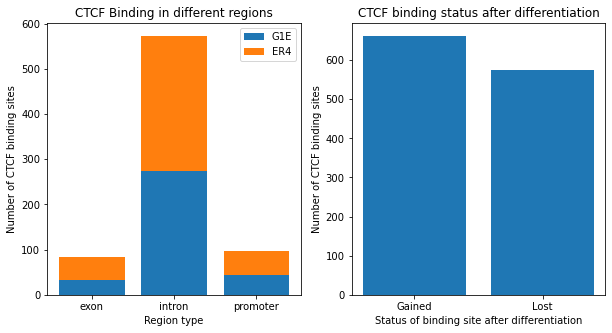

In [85]:
fig, ax = plt.subplots(ncols=2, figsize = (10.0, 5.0))
labels = ['exon', 'intron', 'promoter']
ax[0].bar(labels, g_sums, label = 'G1E')
ax[0].bar(labels, e_sums, bottom = g_sums, label = 'ER4')
ax[0].legend()
ax[0].set_xlabel('Region type')
ax[0].set_ylabel('Number of CTCF binding sites')
ax[0].set_title('CTCF Binding in different regions')
labels2 = ['Gained', 'Lost']
ax[1].bar(labels2, gained_lost)
ax[1].set_xlabel('Status of binding site after differentiation')
ax[1].set_ylabel('Number of CTCF binding sites')
ax[1].set_title('CTCF binding status after differentiation')
plt.show()

In [ ]:
##I don't think this is right....why would there be so much more CTCF binding in introns???